/home/puripat/Documents/Workspace/AIBuilder-LatticeBoltzmann/simulation.py:52: RuntimeWarning: invalid value encountered in divide
  self.speedY = self.momentumY / self.density
/home/puripat/Documents/Workspace/AIBuilder-LatticeBoltzmann/simulation.py:53: RuntimeWarning: invalid value encountered in divide
  self.speedX = self.momentumX / self.density


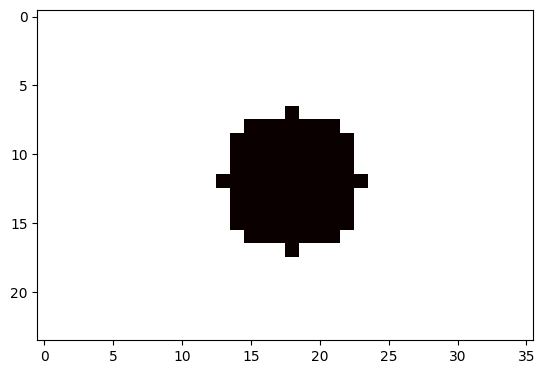

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation

# np.seterr(divide=None, invalid=None)  # For suppressing warnings. Totally optional.

yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()
walls.cylindricalWall([12, 18], 5)
velocityInlet = [] # [VelocityBoundary(12, 2, 1, 1)]
pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

15299.286237207809
False


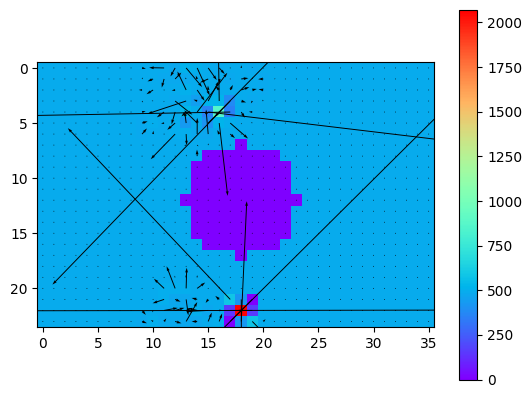

In [23]:
simulation.simulate(step = 1)
print(simulation.isAtDensityEquilibirum(3))

densityPlot = copy.copy(simulation.density)
densityPlot[walls.invertedBoundary] -= np.min(densityPlot[walls.invertedBoundary])

fig, ax = plt.subplots()
heatmap = ax.imshow(densityPlot, cmap = "rainbow", interpolation = "nearest")
quivermap = ax.quiver(simulation.xIndex, simulation.yIndex, simulation.momentumX, -simulation.momentumY)
fig.colorbar(heatmap)
# print(simulation.fluid)
plt.show()